<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Supervised Learning: Regression</center></font></h1>
<h1><center>Cars4U Project</center></h1>
<h3><center>Charlcye Mitchell, October 2022</center></h3>

#Problem Definition

##Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively **predict the price of used cars** and can help the business in **devising profitable strategies using differential pricing.** For example, if the business knows the market price, it will never sell anything below it.

##Objective
- Explore and visualize the dataset
- Build a linear regression model to predict the prices of used cars
- Generate a set of insights and recommendations that will help the business

##Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below:

* **S.No.** - Serial number
* **Name** - Name of the car which includes brand name and model name
* **Location** - Location in which the car is being sold or is available for purchase (cities)
* **Year** - Manufacturing year of the car
* **Kilometers_driven** - The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
* **Fuel_Type** - The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* **Transmission** - The type of transmission used by the car (Automatic/Manual)
* **Owner** - Type of ownership
* **Mileage** - The standard mileage offered by the car company in kmpl or km/kg
* **Engine** - The displacement volume of the engine in CC
* **Power** - The maximum power of the engine in bhp
* **Seats** - The number of seats in the car
* **New_Price** - The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* **Price** - The price of the used car in INR Lakhs

#Exploratory Data Analysis

###Importing the necessary packages

In [76]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

# To supress numerical display in scientific notations to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# To split the data into train and test sets
from sklearn.model_selection import train_test_split

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

    # Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

###Reading the Datasets

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read in the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_cars_data.csv')

In [4]:
# looking at head (5 observations) 
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.00,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.00,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.00,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.00,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.00,53.14,17.74


In [5]:
# count the rows and columns
df.shape

(7253, 14)

In [6]:
# check the null counts and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [7]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [8]:
# We might want to split Name into multiple strings, to assess brand value.
# Let's look at how many vehicles of each type there are.
# pd.set_option('display.max_rows', None) - will show all 2041 rows if you want to see them
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


##Univariate Analysis

Some of these require conversion to numeric, but the assignment guidelines call for that in a later section, so I did it there and then came back to run the visualization. 😅

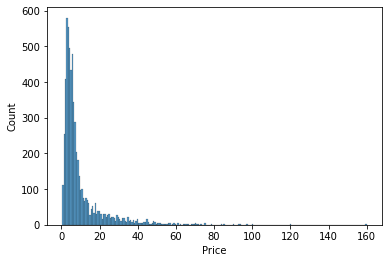

In [34]:
sns.histplot(data=df, x='Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


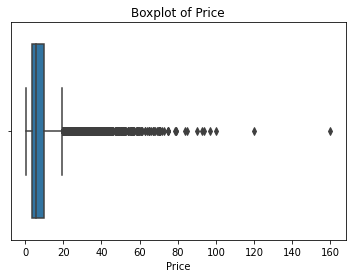

In [35]:
sns.boxplot(df['Price'])
plt.title('Boxplot of Price')
plt.show()

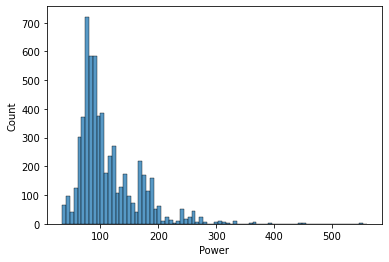

In [36]:
sns.histplot(data=df, x='Power')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


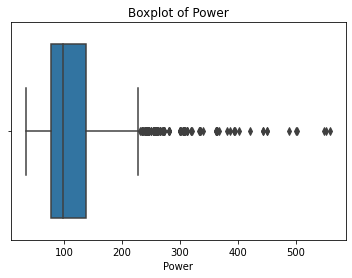

In [37]:
sns.boxplot(df['Power'])
plt.title('Boxplot of Power')
plt.show()

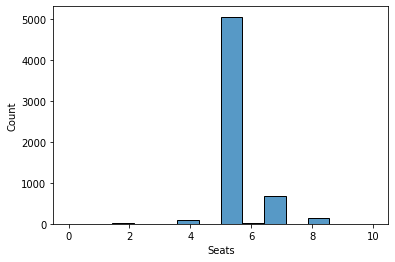

In [38]:
sns.histplot(data=df, x='Seats')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


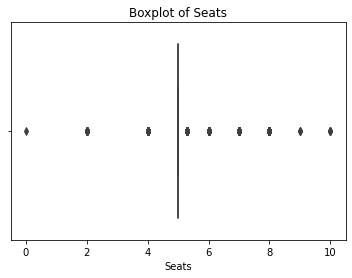

In [39]:
sns.boxplot(df['Seats'])
plt.title('Boxplot of Seats')
plt.show()

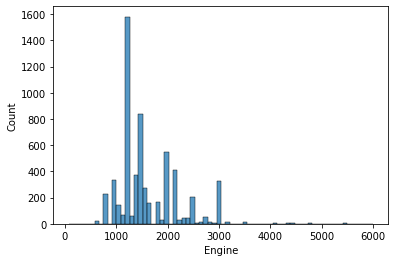

In [40]:
sns.histplot(data=df, x='Engine')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


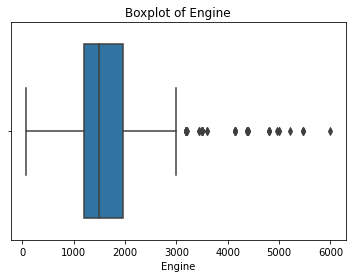

In [41]:
sns.boxplot(df['Engine'])
plt.title('Boxplot of Engine')
plt.show()

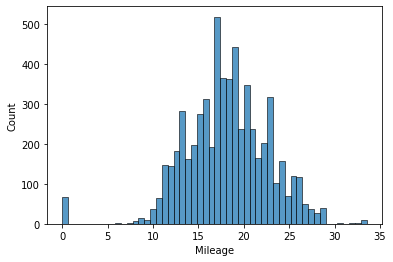

In [42]:
sns.histplot(data=df, x='Mileage')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


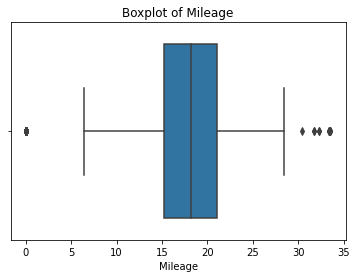

In [43]:
sns.boxplot(df['Mileage'])
plt.title('Boxplot of Mileage')
plt.show()

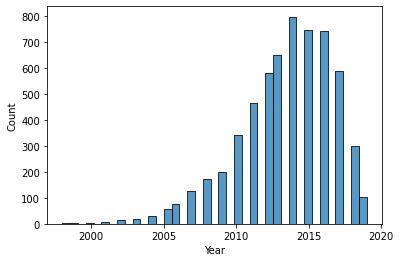

In [44]:
sns.histplot(data=df, x='Year')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


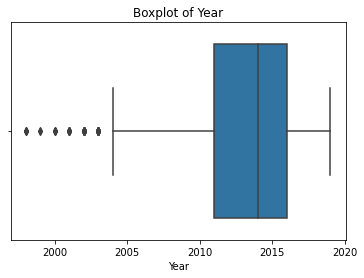

In [45]:
sns.boxplot(df['Year'])
plt.title('Boxplot of Year')
plt.show()

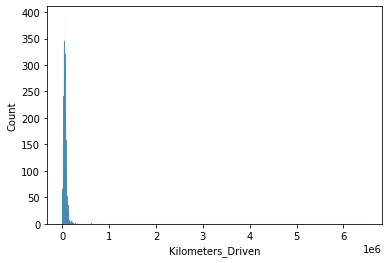

In [46]:
sns.histplot(data=df, x='Kilometers_Driven')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


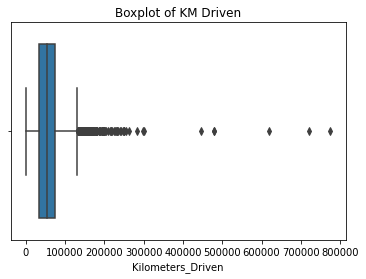

In [51]:
#One of these points looks like it might just be corrupt/invalid data.
sns.boxplot(df['Kilometers_Driven'])
plt.title('Boxplot of KM Driven')
plt.show()

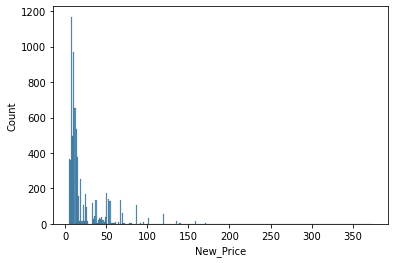

In [17]:
sns.histplot(data=df, x='New_Price')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


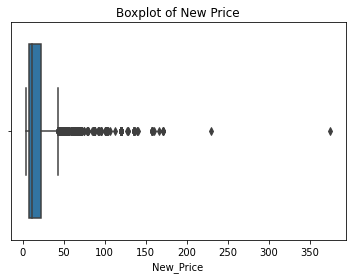

In [48]:
sns.boxplot(df['New_Price'])
plt.title('Boxplot of New Price')
plt.show()

##Bivariate Analysis

Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.

Different types of Bivariate Analysis that can be done:
- Bivariate Analysis of two Numerical Variables
- Bivariate Analysis of two Categorical Variables
- Bivariate Analysis of one Numerical Variables and one Categorical Variable

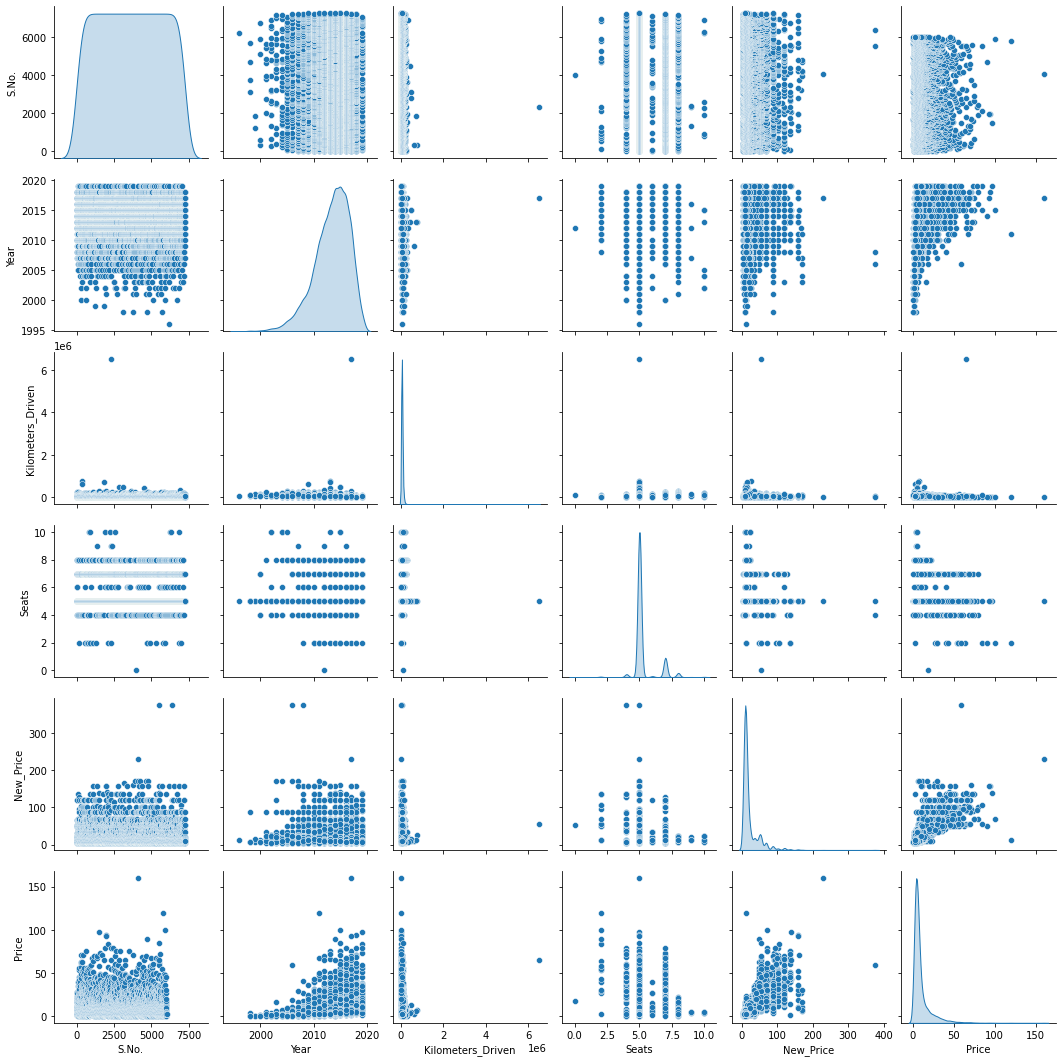

In [18]:
sns.pairplot(df, diag_kind="kde")
plt.show()

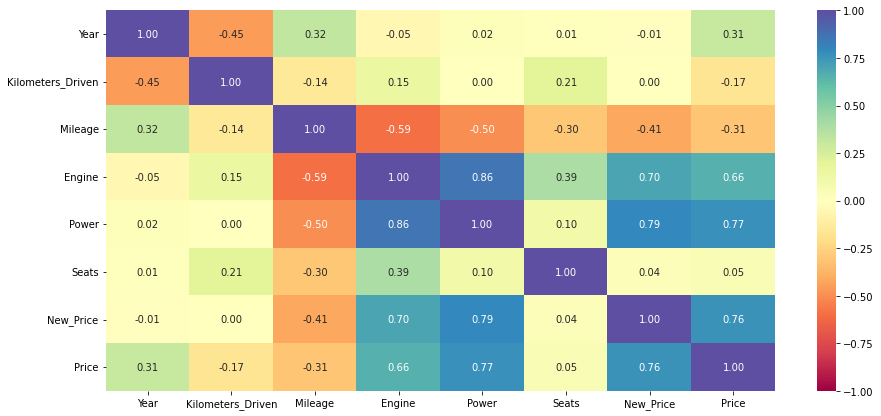

In [54]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#Insights Based on EDA
Key meaningful observations on the relationship between variables

Let's evaluate each row:
0. ✅ We can **drop S.No.** as we won't be using this unique identifier in our analysis.
1. ❌ We might want to **split Name** into multiple strings, to assess brand value. There are 32 unique makes (Ambassador, Audi, Bentley, BMW, Chevrolet, Datsun, Fiat, Force One, Ford, Hindustan Motors, Honda, Hyundai, Isuzu, Jaguar, Jeep, Lamborghini, Land Rover, Mahindra, Maruti, Mercedes-Benz, Mini, Mitsubishi, Nissan, Opel, Porsche, Renault, Skoda, Smart, Tata, Toyota, Volkswagen, Volvo).  
*  ❌ We may need to **treat strings for case uniformity** for instances of Isuzu and ISUZU, for instance.
*  ❌ We could split on the first space, but we'd need to first repair strings like OpelCorsa where there are spaces missing between the brand and the model. There are also cases like "Land Rover" where this wouldn't work because the make contains a space. The best way to split this strings might be to compare them to the model list above.
*   This just doesn't seem worth it for what we're trying to accomplish in this assignment.  ✅ I will **drop the name column.**
2. ❌ **Location** is in good form with no nulls and an appropriate data type.  It might be worth **dividing location into tiers** and looking into whether there is a price difference between the metro areas (Ahmedabad, Bangalore, Chennai, Delhi, Hyderabad, Kolkata, Mumbai, Pune) and the tier 2 cities (Coimbatore, Jaipur, Kochi). This data may surface naturally without manually splitting by tier. This may be a good opportunity to try some geographical map visualizations from the plotly library.
3. **Year** is in good form with no nulls and an appropriate data type.
4. **Kilometers_Driven** is in good form with no nulls and an appropriate data type.
5. **Fuel_Type** is in good form with no nulls and an appropriate data type.
6. **Transmission** is in good form with no nulls and an appropriate data type.
7. ❌ We could **convert Owner_Type to int64** as it represents the number of owners the vehicle has had.
8. ✅ We could **convert Mileage to float64** but we will have to be careful not to compare values from different fuel types to each other since CNG is measured in km/kg and both petrol and deisel are in kmpl.  ✅ We'll also need to **treat 2 missing values using the median.**
9. ✅ We can **convert Engine to float64**. ✅ We'll also need to **treat 46 missing values using the median.**
10. ✅ We can **convert Power to float64**. ✅ We'll also need to **treat 175 missing values using the median.**
11. We should try building a model both before and after we **convert Seats to int64**. ✅ We will also need to **treat 53 missing values using the mean.**  
12. **New_Price** is in good form with no nulls and an appropriate data type.
13. ✅ For **Price** we will need to **treat 1234 missing values.**  Since Price is the target variable, I will **drop the missing values.** I will build the model using both the original "price" column & "log of price" column separately & compare the model performance in both cases.

*   There appear to be positive correlations between engine and power; price and power; new price and power; price and year.
*   There appear to be negative correlations between mileage and price; year and price; mileage and new price; mileage and engine; mileage and power.

**Note:** 
It is generally preferred to drop the missing values in the target variable.
It is generally preferred to impute the missing values in the independent variables using a suitable strategy.
*   For an unskewed numerical variable, the mean of the variable can be used to impute missing values.
*   For a skewed numerical variable, the median of the variable can be used to impute missing values.
*   For a categorical variable, the most frequent value can be used to impute missing values.

#Data Pre-processing

##Prepare the Data for Analysis and Modeling

In [53]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/used_cars_data.csv", index_col=0)
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 6018 rows and 12 columns.


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3767,Coimbatore,2014,69918,Diesel,Manual,First,21.43,1364.00,87.20,5.00,21.09,9.43
3626,Coimbatore,2015,92885,Diesel,Manual,First,20.00,1399.00,68.00,5.00,7.65,3.56
1683,Coimbatore,2017,32642,Diesel,Automatic,First,14.84,2143.00,170.00,5.00,49.49,34.78
3284,Hyderabad,2005,84060,Petrol,Manual,Second,17.30,993.00,60.00,5.00,7.88,1.25
79,Hyderabad,2005,87591,Petrol,Manual,First,0.00,1086.00,97.70,5.00,4.55,1.30
4480,Jaipur,2014,65000,Diesel,Manual,First,24.40,1120.00,71.00,5.00,8.23,6.00
605,Ahmedabad,2015,73000,Diesel,Manual,First,16.00,2179.00,140.00,7.00,18.86,12.50
5123,Delhi,2014,31200,Petrol,Manual,First,18.90,1197.00,82.00,5.00,7.45,3.90
3005,Mumbai,2015,31000,Diesel,Manual,First,13.00,2982.00,168.50,7.00,37.17,19.85
3492,Ahmedabad,2012,74002,Diesel,Automatic,First,16.55,1968.00,140.00,5.00,53.14,18.50


In [23]:
#We can drop S.No. as we won't be using this unique identifier in our analysis.
df.drop(['S.No.'], axis=1, inplace=True)

In [52]:
#Dropping the name column as it's complicating the model with too many variables and not adding value to this assignment.
df.drop(['Name'], axis=1, inplace=True)

In [ ]:
#Remove a point that looks like it might just be corrupt/invalid data.
df.drop(df[df['Kilometers_Driven'] >= 6500000].index, inplace = True)

In [25]:
# Lets convert the engine CC's to a numeric value
df['Engine'] = df['Engine'].str.replace(' CC','').astype(np.float64)

AttributeError: ignored

In [26]:
# Lets convert the power to a numeric value
df['Power'] = df['Power'].str.replace(' bhp','').astype(np.float64)

In [27]:
# Lets convert the mileage to a numeric value
df['Mileage'] = df['Mileage'].str.replace(' kmpl','')
df['Mileage'] = df['Mileage'].str.replace(' km/kg','').astype(np.float64)

In [28]:
# Missing value treatment for Seats using the mean
df['Seats']=df['Seats'].fillna(df['Seats'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7253 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


##Missing Value Treatment

In [29]:
# Drop rows that do not contain values for Price
df.dropna(subset=["Price"], inplace=True)


In [30]:
# Missing value treatment for Engine using the median
df['Engine']=df['Engine'].fillna(df['Engine'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


In [31]:
# Missing value treatment for Power using the median
df['Power']=df['Power'].fillna(df['Power'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


In [32]:
# Missing value treatment for Mileage using the median
df['Mileage']=df['Mileage'].fillna(df['Mileage'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


In [33]:
# looking at which columns have the most missing values
df.isnull().sum().sort_values(ascending=False)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [49]:
df.describe().T  # quick summary of numeric features

,count,mean,std,min,25%,50%,75%,max
Year,6019.00,2013.36,3.27,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.00,58738.38,91268.84,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6019.00,18.13,4.58,0.00,15.17,18.15,21.10,33.54
Engine,6019.00,1620.51,599.64,72.00,1198.00,1493.00,1969.00,5998.00
Power,6019.00,112.88,53.28,34.20,78.00,97.70,138.03,560.00
Seats,6019.00,5.28,0.81,0.00,5.00,5.00,5.00,10.00
New_Price,6019.00,21.50,24.33,3.91,7.88,11.30,21.77,375.00
Price,6019.00,9.48,11.19,0.44,3.50,5.64,9.95,160.00


##Outlier Treatment

In [55]:
# power iqr
quartiles_power = np.quantile(df["Power"][df["Power"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles_power[1] - quartiles_power[0])
print(f"Q1 = {quartiles_power[0]}, Q3 = {quartiles_power[1]}, 4xIQR = {power_4iqr}")
outlier_powers = df.loc[
    np.abs(df["Power"] - df["Power"].median()) > power_4iqr, "Power"
]
outlier_powers

Q1 = 78.0, Q3 = 138.03, 4*IQR = 240.12


70     500.00
134    362.07
148    444.00
152    362.90
418    367.00
589    364.90
1930   364.90
2095   362.07
2100   550.00
2978   394.30
3132   340.00
3341   402.00
4061   444.00
4342   364.90
4451   395.00
4627   450.00
4691   421.00
4722   387.30
4821   450.00
5088   503.00
5341   382.00
5521   552.00
5603   394.30
5781   560.00
5919   488.10
Name: Power, dtype: float64

In [56]:
# drop outliers for Power
df.drop(outlier_powers.index, axis=0, inplace=True)

In [57]:
# engine iqr
quartiles_engine = np.quantile(df["Engine"][df["Engine"].notnull()], [0.25, 0.75])
engine_4iqr = 4 * (quartiles_engine[1] - quartiles_engine[0])
print(f"Q1 = {quartiles_engine[0]}, Q3 = {quartiles_engine[1]}, 4xIQR = {engine_4iqr}")
outlier_engine = df.loc[
    np.abs(df["Engine"] - df["Engine"].median()) > engine_4iqr, "Engine"
]
outlier_engine

Q1 = 1198.0, Q3 = 1968.0, 4*IQR = 3080.0


Series([], Name: Engine, dtype: float64)

In [58]:
# km_driven iqr
quartiles_kmd = np.quantile(
    df["Kilometers_Driven"][df["Kilometers_Driven"].notnull()], [0.25, 0.75]
)
kmd_4iqr = 4 * (quartiles_kmd[1] - quartiles_kmd[0])
print(f"Q1 = {quartiles_kmd[0]}, Q3 = {quartiles_kmd[1]}, 4xIQR = {kmd_4iqr}")
outlier_kmd = df.loc[
    np.abs(df["Kilometers_Driven"] - df["Kilometers_Driven"].median()) > kmd_4iqr,
    "Kilometers_Driven",
]
outlier_kmd

Q1 = 34000.0, Q3 = 73000.0, 4*IQR = 156000.0


29      262000
77      230000
181     216000
340     775000
358     620000
838     215000
1068    225000
1101    248000
1442    231673
1528    299322
1766    220000
1846    255000
1860    720000
1975    282000
2267    215750
2346    234000
2823    480000
2988    240000
3092    480000
3649    300000
3713    232000
3894    250000
4491    445000
4719    250000
4792    242000
5647    227000
5800    210000
5834    250000
Name: Kilometers_Driven, dtype: int64

In [59]:
# drop outliers for kilometers driven
df.drop(outlier_kmd.index, axis=0, inplace=True)

In [61]:
# year iqr
quartiles_year = np.quantile(df["Year"][df["Year"].notnull()], [0.25, 0.75])
year_4iqr = 4 * (quartiles_year[1] - quartiles_year[0])
print(f"Q1 = {quartiles_kmd[0]}, Q3 = {quartiles_year[1]}, 4xIQR = {year_4iqr}")
outlier_year = df.loc[
    np.abs(df["Year"] - df["Year"].median()) > year_4iqr, "Year",
]
outlier_year

Q1 = 34000.0, Q3 = 2016.0, 4xIQR = 20.0


Series([], Name: Year, dtype: int64)

##Feature Engineering

In [62]:
# copy dataset
df1 = df.copy()

# average mileage, engine, and power to create a simpler unified performance variable
df1["Performance_measure"] = (df1["Mileage"] + df1["Engine"] + df1["Power"]) / 3
df1.drop(["Mileage", "Engine", "Power"], axis=1, inplace=True)
np.random.seed(1)
df1.sample(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Performance_measure
4184,Kolkata,2010,45000,Petrol,Manual,First,5.00,10.25,1.90,431.83
2329,Jaipur,2015,63000,Diesel,Manual,First,5.00,10.15,5.11,535.65
5143,Mumbai,2016,33000,Diesel,Manual,First,7.00,18.86,9.65,778.33
1009,Hyderabad,2014,81000,Diesel,Manual,First,5.00,7.88,6.10,449.07
3130,Mumbai,2014,61529,Petrol,Automatic,First,5.00,13.23,5.65,439.56
3073,Hyderabad,2011,84062,Diesel,Manual,First,5.00,25.83,5.80,698.83
3298,Coimbatore,2017,51210,Petrol,Automatic,First,5.00,11.11,8.89,494.41
3284,Hyderabad,2005,84060,Petrol,Manual,Second,5.00,7.88,1.25,356.77
3296,Mumbai,2015,31000,Petrol,Manual,First,5.00,9.60,4.90,435.47
774,Ahmedabad,2013,94000,Diesel,Manual,First,8.00,24.01,8.85,869.60


#Model Building - Linear Regression
Build the model and comment on the model performance

In [63]:
#independent variable
ind_vars = df1.drop(["Price"], axis=1)

# dependent variable
dep_var = df1[["Price"]]

Create dummy variables

In [64]:
# encoding fx
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


# independent vars with encoded categorical vars
ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Year,Kilometers_Driven,Seats,New_Price,Performance_measure,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,5.00,5.51,360.92,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,2015,41000,5.00,16.06,575.96,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
2,2011,46000,5.00,8.61,435.30,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000,7.00,11.27,452.51,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2013,40670,5.00,53.14,708.00,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [69]:
# Create training dataset and test dataset
x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

In [70]:
# check shape of data
print("Training dataset =", x_train.shape[0])
print("Test dataset =", x_test.shape[0])

Training dataset = 4175
Test dataset = 1790


In [71]:
# Linear regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [72]:
# check coefficients and intercept
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,0.87
Kilometers_Driven,-0.00
Seats,-0.64
New_Price,0.25
Performance_measure,0.01
Location_Bangalore,2.20
Location_Chennai,1.52
Location_Coimbatore,1.96
Location_Delhi,-0.27
Location_Hyderabad,2.02


#Model Performance Evaluation
Evaluate the model on different performance metrics

In [77]:
# Training dataset
print("Training Performance:\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Test dataset
print("\n\nTest Performance:\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance:

   RMSE  MAE  R^2  Adjusted R^2
0  5.27 3.02 0.77          0.77


Test Performance:

   RMSE  MAE  R^2  Adjusted R^2
0  5.24 2.97 0.74          0.74


#Actionable Insights & Recommendations
Conclude with the key takeaways for the business


*   Using this model, businesses can predict the price of a used vehicles with an  R2  of 0.666 on the training set, and a mean error of 3.971 on the test set.
*   Price increases with engine, and power, and fuel type.
*   Price can decrease by transmission, seats, or kilometers driven.